In [1]:
# Membaca file log
file_path = 'all_log.txt' 
with open(file_path, 'r', encoding='latin-1') as file:
    lines = file.readlines()

# Inisialisasi variabel untuk menyimpan nilai-nilai untuk setiap epoch
values_per_epoch = {}
current_epoch = None

# Loop melalui setiap baris dalam file log
for line in lines:
    # Memeriksa jika baris berisi informasi epoch
    if line.startswith('Epoch'):
        # Memisahkan nilai IOU, Obj, Cls dari teks baris tersebut
        info_parts = line.split(' ')
        iou_value = float(info_parts[2].split(':')[-1])
        obj_value = float(info_parts[3].split(':')[-1])
        cls_value = float(info_parts[4].split(':')[-1])
        
        # Mendapatkan nomor epoch dari baris saat ini
        epoch_number = int(info_parts[0].split(':')[-1])
        
        # Menyimpan nilai-nilai ke dalam dictionary sesuai dengan epoch
        values_per_epoch[epoch_number] = {'IOU': iou_value, 'Obj': obj_value, 'Cls': cls_value}
        current_epoch = epoch_number  # Update nomor epoch saat ini

# Menampilkan nilai-nilai yang telah diekstrak untuk setiap epoch
for epoch, values in values_per_epoch.items():
    print(f'Epoch {epoch}: IOU = {values["IOU"]}, Obj = {values["Obj"]}, Cls = {values["Cls"]}')

Epoch 0: IOU = 0.771951, Obj = 0.121543, Cls = 2.372723
Epoch 1: IOU = 0.72956, Obj = 0.117485, Cls = 2.318703
Epoch 2: IOU = 0.633698, Obj = 0.097648, Cls = 1.922977
Epoch 3: IOU = 0.497382, Obj = 0.053267, Cls = 1.586966
Epoch 4: IOU = 0.39515, Obj = 0.029858, Cls = 1.29612
Epoch 5: IOU = 0.348911, Obj = 0.021341, Cls = 1.300251
Epoch 6: IOU = 0.357527, Obj = 0.017148, Cls = 1.164263
Epoch 7: IOU = 0.342882, Obj = 0.015679, Cls = 1.00806
Epoch 8: IOU = 0.318591, Obj = 0.014673, Cls = 1.060323
Epoch 9: IOU = 0.286014, Obj = 0.014903, Cls = 1.200328
Epoch 10: IOU = 0.283513, Obj = 0.013813, Cls = 0.999246
Epoch 11: IOU = 0.316705, Obj = 0.012851, Cls = 0.93636
Epoch 12: IOU = 0.279048, Obj = 0.01233, Cls = 1.084761
Epoch 13: IOU = 0.263378, Obj = 0.013389, Cls = 1.054157
Epoch 14: IOU = 0.271206, Obj = 0.013859, Cls = 0.98736
Epoch 15: IOU = 0.285446, Obj = 0.012551, Cls = 1.056756
Epoch 16: IOU = 0.274187, Obj = 0.012341, Cls = 0.92045
Epoch 17: IOU = 0.263295, Obj = 0.012656, Cls = 0

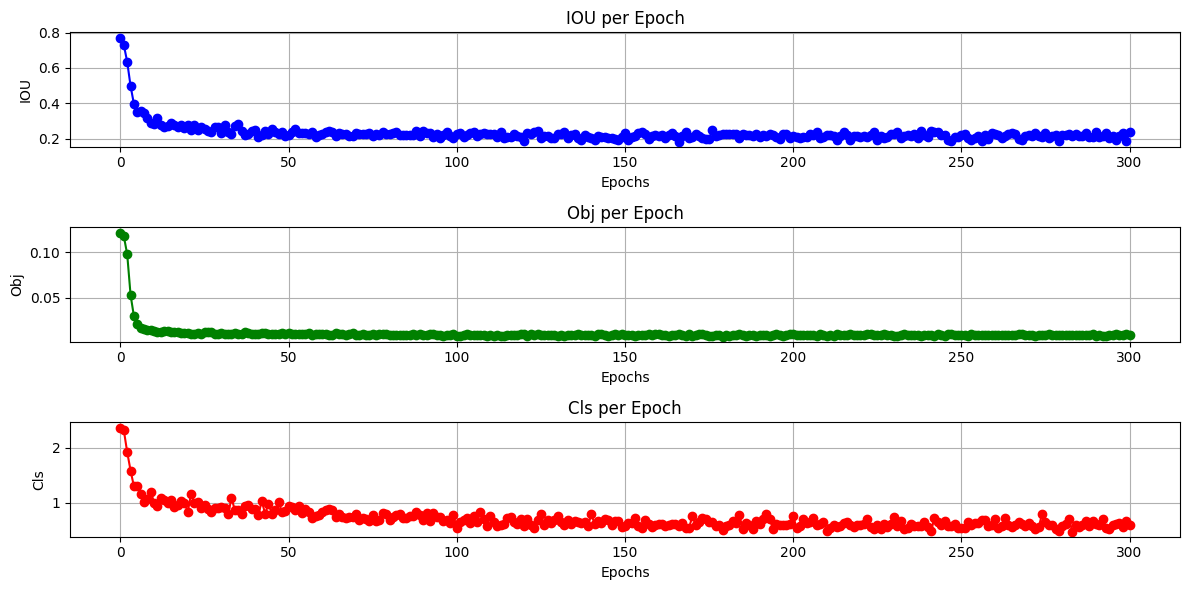

In [4]:
import matplotlib.pyplot as plt

# Diberikan dictionary values_per_epoch yang berisi nilai-nilai dari setiap epoch
# Contoh values_per_epoch: {1: {'IOU': 0.71, 'Obj': 0.12, 'Cls': 2.36}, 2: {'IOU': 0.73, 'Obj': 0.12, 'Cls': 2.34}, ...}

epochs = list(values_per_epoch.keys())
iou_values = [values_per_epoch[epoch]['IOU'] for epoch in epochs]
obj_values = [values_per_epoch[epoch]['Obj'] for epoch in epochs]
cls_values = [values_per_epoch[epoch]['Cls'] for epoch in epochs]

plt.figure(figsize=(12, 6))

# Plot IOU
plt.subplot(311)
plt.plot(epochs, iou_values, marker='o', color='blue')
plt.title('IOU per Epoch')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.grid(True)

# Plot Obj
plt.subplot(312)
plt.plot(epochs, obj_values, marker='o', color='green')
plt.title('Obj per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Obj')
plt.grid(True)

# Plot Cls
plt.subplot(313)
plt.plot(epochs, cls_values, marker='o', color='red')
plt.title('Cls per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Cls')
plt.grid(True)

plt.tight_layout()
plt.show()